No Free Lunch Theorem

ما هر مدلی که انتخاب می‌کنیم در واقع داریم یکسری فرضها در مورد دیتامون در نظر میگیریم. اگر هیچ فرض اولیه ای نداشته باشیم یعنی همه مدل ها برامون یکی هستند. برای بعضی دیتاست ها یک مدل خطی بهتر عمل میکنه ولی برای بعضی های دیگه شبکه عصبی بهتر میتونه رفتار رو مدل کنه. پس ما مدل های مختلفی رو برای دیتاست مون تست میکنیم..

# Chapter2: Housing Prices

اول چارچوب کار رو مشخص میکنیم.مساله مون یادگیری نظارتی - رگرسیون ساده - رگرسیون چندگانه (ورودی هامون چندتاست) و همچنین خروجی مون هم فقط یک مقدار هست. قیمت خانه

قدم بعدی اینه که نحوه ارزیابی مدل رو مشخص کنیم. معمولا وقتی اوتلایر زیادی نداریم از RMSE استفاده میشه

در غیر این صورت از MAE


# Downloading and getting familiar with the Data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()


When load_housing_data() is called, it looks for the datasets/housing.tgz file. If it
does not find it, it creates the datasets directory inside the current directory (which
is /content by default, in Colab), downloads the housing.tgz file from the ageron/data
GitHub repository, and extracts its content into the datasets directory; this creates the
datasets/housing directory with the housing.csv file inside it. Lastly, the function loads
this CSV file into a Pandas DataFrame object containing all the data, and returns it.

In [2]:
housing.head()
# each row is a district with 600 to 7000 population

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


207 districts are missing "total_bedrooms" feature which we're gonna take care of that later

ocean_proximity is categorical. we can get the categories as below

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
# کد زیر اون مناطقی که جمعیت بالای هفت هزار دارن رو نشون میده که تعدادشون 122 تاست
#housing[housing.population > 7000]

میتونیم هیستوگرام کل فیچرها رو یه جا ببینیم

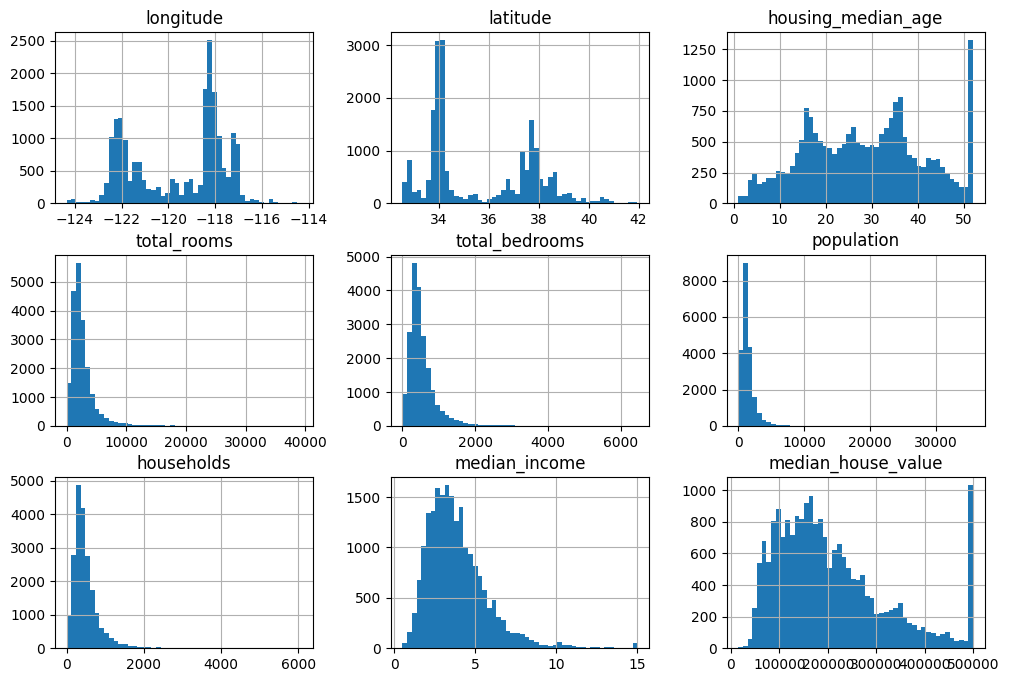

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

اولا که خیلی از فیچرهامون زنگی شکل نیستند که این باید اوکی بشه تا الگوریتم های یادگیری ماشین عملکرد بهتری داشته باشند. هچنین برای میانه قیمت خانه در یک منطقه مشخص که در واقع خروجی مدل ها هست میبینیم که از پونصدهزارتا بیشتر نیست. در واقع اعداد بالاتر از پونصدهزارتا رو اورده رو همون پونصد هزارتا 

# Train Test split

قبل از اینکه بخواهیم کاری روی دیتا انجام بدیم اول یک مقداری از دیتا رو کنار میذاریم که بعدا بتونیم عملکرد مدل رو باهاش بسنجیم و اورفیت نشه. معمولا بیست درصد رو کنار بذاریم اوکیه ولی در دیتاست های خیلی بزرگتر میتونه کمتر هم باشه

یک نکته اینه که این دیتای تست رو که جدا میکنیم دفعه های بعدی که کد رو اجرا میکنیم تغییر نکنه. اونطوری مدل هر سری ممکنه دیتای تست دفعات قبل رو ببینه و به مرور کل دیتا رو دیده. مثلا میتونیم یکسری ردیف های خاصی رو جدا کنیم به شرطی که اولا در آینده هیچ ردیفی حذف نشه و اگر هم که دیتای جدیدی اضافه شد بره آخر لیست که ترتیب ردیفا به هم نخوره

نکته آخر هم اینکه بهتره مطمئن بشیم دیتایی که به عنوان تست برمیداریم نماینده کل دیتاست هست. مثلا اینجا میتونیم درآمد رو به گروه های مختلف تقسیم کنیم و دیتای تست رو از هر گروه انتخاب کنیم

most median income values are clustered around
1.5 to 6 (i.e., $15,000–$60,000), but some median incomes go far beyond 6. It is
important to have a sufficient number of instances in your dataset for each stratum,
or else the estimate of a stratum’s importance may be biased.

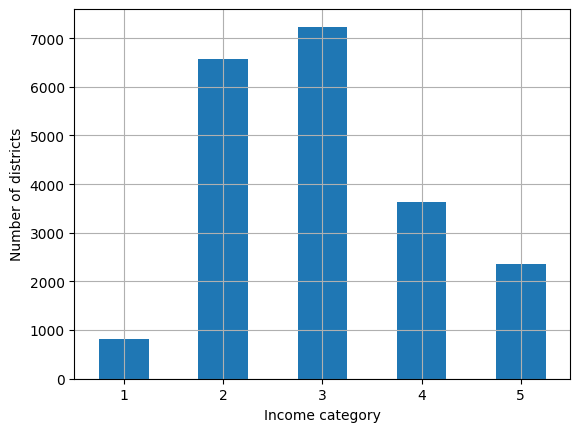

In [8]:
import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"],
                                bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

1: 0-15000$ 2:15000-30000$ ... 5:60000-infinity

In [9]:
from sklearn.model_selection import train_test_split
start_train_test, start_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

# Explore and Visualize the data

In [10]:
# Since you’re going to experiment with various transformations of the full training set, you should make a copy of the original so you can revert to it afterwards:
housing = start_test_set.copy()

## Geographical visualization

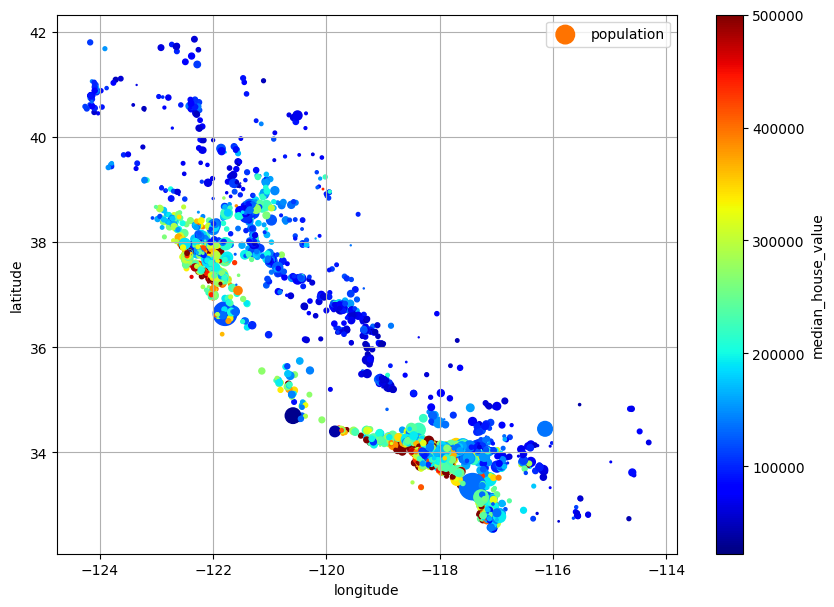

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
    s=housing["population"] / 100 , label="population",
    c="median_house_value", cmap="jet", colorbar=True,
    legend=True, sharex=False, figsize=(10, 7))
plt.show()

اون اس میگه که شعاع دایره های پلات اسکتر متناسب با جمعیت اون دیتا باشه. برای اینکه دایره ها خیلی بزرگ میشن بر صد تقسیم شدن. سی هم میگه رنگ دایره های اسکتر متناسب با قیمت شون باشه. حالا این کالر مپ رونگ رو رو جت گذاشتیم که یک چیز از پیش تعریف شده است و برای مقادیر کم آبی و برای مقادیر زیاد قرمز میکنه. 

## Correlations

کورولیشن فیچرهای مختلف با قیمت خانه رو ببینیم

In [12]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\mrkhe\AppData\Local\Temp\ipykernel_13428\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
Name: median_house_value, dtype: float64

کورولیشن فیچرهای مختلف با هم رو هم ببینیم البته اینجا یازده تا فیچر هست و بخواهیم هردوتا رو با هم مقایسه کنیم صد و خورده ای تا نمودار میشه. یکسری فیچرهای منتخبی رو مورد بررسی قرار میدیم

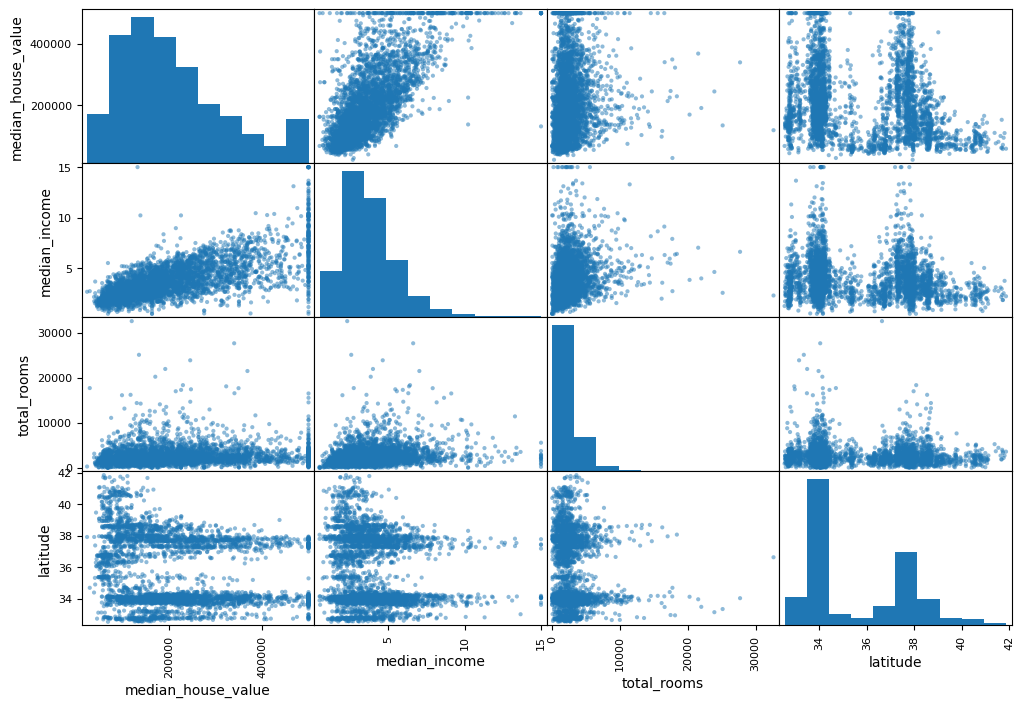

In [13]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "latitude"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

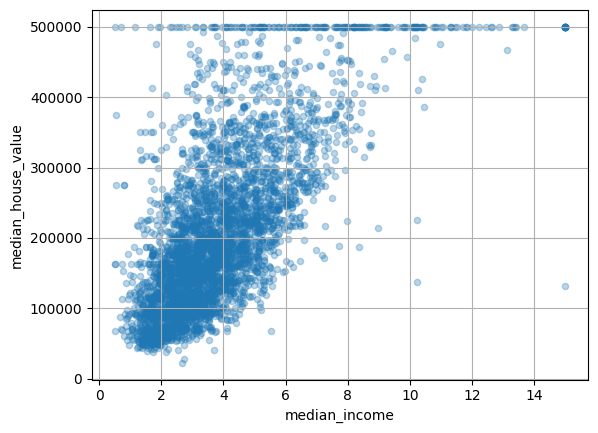

In [14]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
    alpha=0.3, grid=True) # آلفا باعث میشه تجمع دیتا در یک بخش خوب دیده بشه یعنی پررنگ تر دیده بشه
plt.show()

یک نکته که مهمه البته در این دیتاست شاید خیلی اهمیت نداشته باشه اینه که ضریب همبستگی فقط به صورت خطی رو نشون میده و ممکنه دوتا متغییر خیلی به هم وابسته باشن ولی ئابستگی شون خطی نباشه 

## Attribute combination

میتونیم یکسری فیچرها رو با هم ادغام کنیم به نحوی تا که یک فیچر جدید و احتمالا بهتر حاصل بشه. مثلا فیچر تعداد اتاق خواب به کل اتاقها رو داریم که کورولیشن نسبتا خوبی حاصل کرده:

In [15]:
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\mrkhe\AppData\Local\Temp\ipykernel_13428\3763601828.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.687091
total_rooms           0.121070
housing_median_age    0.118976
households            0.043549
total_bedrooms        0.029600
longitude            -0.026768
population           -0.040286
latitude             -0.162087
bedrooms_ratio       -0.254506
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

اول یک کپی بسازیم